<a href="https://colab.research.google.com/github/rroxy08/CE888/blob/master/Lab4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold

In [0]:
dframe=pd.read_csv("https://raw.githubusercontent.com/rroxy08/CE888/master/lab4/bank-additional-full.csv",delimiter=";")

#dframe.columns
features=["age","job","education","contact","campaign"]
outcomes=["y"]

dframe[["job"]] = dframe[["job"]].apply(LabelEncoder().fit_transform)
dframe[["education"]] = dframe[["education"]].apply(LabelEncoder().fit_transform)
dframe[["contact"]] = dframe[["contact"]].apply(LabelEncoder().fit_transform)


dframe[features]

,age,job,education,contact,campaign
0,56,3,0,1,1
1,57,7,3,1,1
2,37,7,3,1,1
3,40,0,1,1,1
4,56,7,3,1,1
...,...,...,...,...,...
41183,73,5,5,0,1
41184,46,1,5,0,1
41185,56,5,6,0,2
41186,44,9,5,0,1


In [0]:
dframe=dframe.dropna()
dframe_dummies=pd.get_dummies(dframe,prefix_sep='_')

if "y_no" in dframe_dummies.columns:
  del dframe_dummies["y_no"]

if "duration" in dframe_dummies.columns:
  del dframe_dummies["duration"]

dframe_dummies["y_yes"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8

In [0]:
#X_dframe=dframe_dummies[features]
y_dframe=dframe_dummies['y_yes'].copy()

y_dframe




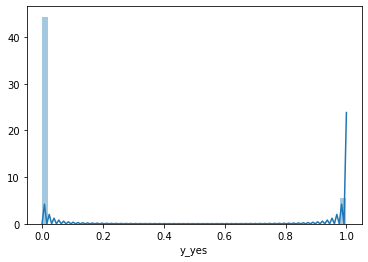

In [0]:
sns_plot = sns.distplot(y_dframe, hist=True)


In [0]:
X_df=dframe[features].copy()
y_df=dframe[outcomes].copy()

X=X_df.values
y=y_df.values

clf=ExtraTreesClassifier(n_estimators=1000,max_depth=4)
clf.fit(X,y)
print(acc(y,clf.predict(X)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

In [0]:
X = dframe_dummies.values
y = dframe_dummies.values.T[-1]
group_kfold = GroupKFold(n_splits=2)
for train_index, test_index in group_kfold.split(X, y,groups='none'):
  print("TRAIN:", train_index, "TEST:", test_index)
  #X_train, X_test = X[train_index], X[test_index]
  #y_train, y_test = y[train_index], y[test_index]
  #print(X_train, X_test, y_train, y_test)


ValueError: ignored

In [0]:
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

In [0]:
X = dframe_dummies.values
y = dframe_dummies.values.T[-1]
group_kfold = GroupKFold(n_splits=10)
group_kfold.split(X, y,groups='none')
for train_index, test_index in group_kfold.split(X, y, groups):
  print("TRAIN:", train_index, "TEST:", test_index)